# **Estimation of Obesity Levels Based On Eating Habits and Physical Condition**

Week 10 Machine Learning

Raihana Fawaz (1103210102)

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [2]:
# Memuat dataset
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
df.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [6]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [7]:
# Melakukan encoding pada kolom kategorikal menggunakan LabelEncoder
label_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
label_encoder = LabelEncoder()

for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [8]:
# Menentukan fitur (X) dan target (y)
X = df.drop(['NObeyesdad'], axis=1)  # Menghapus kolom target
y = df['NObeyesdad']  # Kolom target

In [9]:
# Split data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Standardisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# Konversi data ke tensor
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # Untuk klasifikasi, y harus bertipe long (integer)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [12]:
# Menyusun model MLP untuk klasifikasi
class MLPClassification(nn.Module):
    def __init__(self, input_size, hidden_layers, neurons, activation):
        super(MLPClassification, self).__init__()
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.neurons = neurons
        self.activation = activation

        # Membuat layer input ke layer tersembunyi
        layers = []
        layers.append(nn.Linear(self.input_size, self.neurons))

        # Menambahkan hidden layers
        for _ in range(self.hidden_layers - 1):
            layers.append(self.activation())
            layers.append(nn.Linear(self.neurons, self.neurons))

        layers.append(nn.Linear(self.neurons, len(y.unique())))  # Jumlah kelas output (misalnya, 2 atau lebih)
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

In [13]:
# Setup perangkat (GPU jika tersedia)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [14]:
# Hyperparameter yang akan diuji
hidden_layers = [1, 2, 3]
neurons = [4, 8, 16, 32, 64]
activations = [nn.Sigmoid, nn.Softmax, nn.ReLU, nn.Tanh]
epochs_list = [1,10,25,50,100,250]
learning_rates = [10, 1, 0.1, 0.01, 0.001, 0.0001]
batch_sizes = [16,32,64,128,256,512]

# Menyimpan hasil
results = []

In [15]:
# Melakukan eksperimen dengan kombinasi hyperparameter
for layers in hidden_layers:
    for neuron in neurons:
        for activation in activations:
            for epochs in epochs_list:
                for lr in learning_rates:
                    for batch_size in batch_sizes:
                        # Membuat dan memindahkan model ke perangkat (GPU atau CPU)
                        model = MLPClassification(input_size=X_train_tensor.shape[1],
                                                  hidden_layers=layers,
                                                  neurons=neuron,
                                                  activation=activation).to(device)

                        # Mendefinisikan loss function dan optimizer
                        criterion = nn.CrossEntropyLoss()  # Untuk klasifikasi multi-kelas
                        optimizer = optim.Adam(model.parameters(), lr=lr)

                        # Training loop
                        for epoch in range(epochs):
                            model.train()
                            optimizer.zero_grad()
                            outputs = model(X_train_tensor.to(device))
                            loss = criterion(outputs, y_train_tensor.to(device))
                            loss.backward()
                            optimizer.step()

                        # Evaluasi model setelah pelatihan
                        model.eval()
                        with torch.no_grad():
                            outputs = model(X_test_tensor.to(device))
                            _, predicted = torch.max(outputs, 1)  # Mengambil kelas dengan probabilitas tertinggi
                            accuracy = accuracy_score(y_test_tensor.cpu(), predicted.cpu())

                        # Menyimpan hasil
                        results.append({
                            'layers': layers,
                            'neurons': neuron,
                            'activation': activation.__name__,
                            'epochs': epochs,
                            'lr': lr,
                            'batch_size': batch_size,
                            'accuracy': accuracy
                        })
                        print(f"Layers: {layers}, Neurons: {neuron}, Activation: {activation.__name__}, Epochs: {epochs}, LR: {lr}, Batch Size: {batch_size}, Accuracy:{accuracy}")

Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 10, Batch Size: 16, Accuracy:0.11583924349881797
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 10, Batch Size: 32, Accuracy:0.061465721040189124
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 10, Batch Size: 64, Accuracy:0.07565011820330969
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 10, Batch Size: 128, Accuracy:0.19858156028368795
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 10, Batch Size: 256, Accuracy:0.07801418439716312
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 10, Batch Size: 512, Accuracy:0.14893617021276595
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 1, Batch Size: 16, Accuracy:0.18912529550827423
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 1, Batch Size: 32, Accuracy:0.15130023640661938
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 1, Batch Size: 64, Accuracy:0.1702127659574468
Layers: 1, Neurons: 4, Activ

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy:0.15839243498817968
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy:0.04018912529550828
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy:0.20567375886524822
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy:0.13238770685579196
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy:0.3971631205673759
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy:0.30260047281323876
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy:0.37115839243498816


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy:0.28132387706855794
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy:0.17494089834515367
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy:0.3404255319148936
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy:0.3971631205673759
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy:0.2127659574468085
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy:0.48936170212765956
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy:0.47754137115839246


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy:0.3806146572104019
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy:0.4799054373522459
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy:0.3191489361702128
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy:0.4728132387706856
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy:0.2222222222222222
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy:0.14893617021276595
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy:0.14893617021276595
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy:0.23404255319148937
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy:0.13711583924349882
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy:0.13711583924349882
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy:0.1702127659574468
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy:0.11347517730496454
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy:0.11583924349881797
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy:0.12056737588652482
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy:0.18439716312056736
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy:0.13711583924349882
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy:0.13238770685579196
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy:0.13238770685579196
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy:0.14893617021276595
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy:0.11583924349881797
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy:0.1702127659574468
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy:0.2553191489361702


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy:0.2718676122931442
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy:0.1702127659574468
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy:0.24822695035460993


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy:0.42789598108747046
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy:0.26004728132387706
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy:0.4562647754137116


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy:0.41843971631205673
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy:0.37115839243498816
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy:0.42789598108747046


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy:0.6122931442080378
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy:0.7021276595744681
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy:0.6643026004728132


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy:0.6808510638297872
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy:0.6643026004728132
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy:0.6737588652482269


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy:0.4302600472813239
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy:0.34278959810874704
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy:0.3947990543735225


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy:0.28368794326241137
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy:0.26713947990543735
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy:0.30260047281323876


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy:0.1867612293144208
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy:0.1347517730496454
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy:0.1182033096926714
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy:0.17257683215130024
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy:0.14184397163120568
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy:0.13711583924349882
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy:0.14893617021276595
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy:0.13238770685579196
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy:0.16784869976359337


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy:0.3546099290780142
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy:0.2695035460992908


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy:0.34515366430260047
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy:0.2576832151300236


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy:0.2576832151300236
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy:0.2198581560283688


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy:0.4728132387706856
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy:0.4846335697399527


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy:0.5271867612293144
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy:0.5106382978723404


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy:0.44680851063829785
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy:0.4231678486997636


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy:0.8037825059101655
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy:0.8841607565011821


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy:0.9456264775413712
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy:0.8841607565011821


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy:0.9196217494089834
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy:0.9078014184397163


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy:0.3877068557919622
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy:0.4562647754137116


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy:0.40189125295508277
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy:0.3262411347517731


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy:0.3215130023640662
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy:0.4657210401891253


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy:0.13238770685579196
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy:0.1702127659574468


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy:0.23167848699763594
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy:0.16784869976359337


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy:0.1276595744680851
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy:0.14657210401891252
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy:0.1276595744680851


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy:0.03546099290780142
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy:0.13711583924349882
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy:0.13947990543735225


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy:0.15602836879432624


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy:0.24113475177304963


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy:0.20803782505910165


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy:0.2789598108747045


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy:0.28841607565011823


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy:0.508274231678487


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy:0.6193853427895981


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy:0.48699763593380613


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy:0.4940898345153664


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy:0.42080378250591016


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy:0.5508274231678487


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy:0.9408983451536643


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy:0.950354609929078


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy:0.9527186761229315


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy:0.9550827423167849


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy:0.9645390070921985


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy:0.9621749408983451


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy:0.6832151300236406


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy:0.5933806146572104


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy:0.6382978723404256


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy:0.6477541371158393


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy:0.5555555555555556


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy:0.607565011820331


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy:0.17494089834515367


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy:0.19148936170212766


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy:0.22695035460992907


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy:0.28132387706855794


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy:0.1347517730496454


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy:0.1347517730496454


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy:0.2695035460992908


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy:0.17494089834515367


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy:0.42789598108747046


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy:0.28132387706855794


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy:0.2624113475177305


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy:0.3333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy:0.5508274231678487


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy:0.5200945626477541


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy:0.508274231678487


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy:0.6382978723404256


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy:0.5721040189125296


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy:0.6784869976359338


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy:0.9598108747044918


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy:0.9716312056737588


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy:0.9621749408983451


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy:0.9739952718676123


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy:0.9527186761229315


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy:0.9787234042553191


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy:0.9479905437352246


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy:0.9078014184397163


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy:0.9148936170212766


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy:0.8865248226950354


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy:0.9030732860520094


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy:0.9101654846335697


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy:0.3971631205673759


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy:0.408983451536643


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy:0.41371158392434987


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy:0.34278959810874704


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy:0.4562647754137116


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy:0.3829787234042553


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy:0.23404255319148937


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy:0.1016548463356974
Layers: 2, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 16, Accuracy:0.1347517730496454
Layers: 2, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 32, Accuracy:0.18439716312056736
Layers: 2, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 64, Accuracy:0.13238770685579196
Layers: 2, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 128, Accuracy:0.11347517730496454
Layers: 2, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 256, Accuracy:0.2576832151300236
Layers: 2, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 512, Accuracy:0.20094562647754138
Layers: 2, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 16, Accuracy:0.06382978723404255
Layers: 2, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 32, Accuracy:0.12529550827423167
Layers: 2, Neurons: 4, Activation: ReLU, Epochs

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 16, Accuracy:0.1182033096926714
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 32, Accuracy:0.13238770685579196
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 64, Accuracy:0.13238770685579196
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 128, Accuracy:0.14893617021276595
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 256, Accuracy:0.13711583924349882
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 512, Accuracy:0.13238770685579196
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy:0.28132387706855794
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy:0.2647754137115839
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy:0.2695035460992908
L

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy:0.1702127659574468
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy:0.21749408983451538
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy:0.3309692671394799
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy:0.35933806146572106
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy:0.41134751773049644


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy:0.3947990543735225
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy:0.23404255319148937
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy:0.23877068557919623
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy:0.5697399527186762
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy:0.4846335697399527
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy:0.5815602836879432
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy:0.5957446808510638

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy:0.5626477541371159
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy:0.5224586288416075
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy:0.18439716312056736
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy:0.28841607565011823
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy:0.2695035460992908


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy:0.23404255319148937
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy:0.3120567375886525
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy:0.2860520094562648
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy:0.14893617021276595
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy:0.13711583924349882
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy:0.18439716312056736
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy:0.18439716312056736
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy:0.13711583924349882
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy:0.12056737588652482
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy:0.13947990543735225
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy:0.14893617021276595
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy:0.1182033096926714
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy:0.13711583924349882
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy:0.1938534278959811


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy:0.3380614657210402
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy:0.3971631205673759
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy:0.29550827423167847


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy:0.30969267139479906
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy:0.35224586288416077
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy:0.4326241134751773


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy:0.41371158392434987
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy:0.5153664302600472
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy:0.47754137115839246
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy:0.3049645390070922


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy:0.35224586288416077
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy:0.7328605200945626
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy:0.8108747044917257
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy:0.7872340425531915


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy:0.7304964539007093
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy:0.7706855791962175
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy:0.7943262411347518
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy:0.41134751773049644


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy:0.47044917257683216
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy:0.3829787234042553
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy:0.408983451536643
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy:0.3475177304964539


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy:0.43498817966903075
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy:0.12529550827423167
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy:0.14893617021276595
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy:0.18439716312056736
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy:0.13238770685579196
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy:0.13711583924349882
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy:0.1867612293144208
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy:0.14657210401891252
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy:0.13711583924349882
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy:0.1867612293144208
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy:0.425531914893617


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy:0.2978723404255319
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy:0.30969267139479906


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy:0.19148936170212766
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy:0.2718676122931442


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy:0.2765957446808511
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy:0.41134751773049644


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy:0.475177304964539
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy:0.4799054373522459


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy:0.491725768321513
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy:0.4728132387706856


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy:0.4491725768321513
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy:0.9196217494089834


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy:0.933806146572104
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy:0.8628841607565012


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy:0.9030732860520094
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy:0.9527186761229315


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy:0.91725768321513
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy:0.5484633569739953


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy:0.5390070921985816
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy:0.5626477541371159


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy:0.5295508274231678
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy:0.48699763593380613


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy:0.5295508274231678
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy:0.22458628841607564


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy:0.14893617021276595
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy:0.18912529550827423


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy:0.13711583924349882
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy:0.16312056737588654


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy:0.18203309692671396
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy:0.13947990543735225


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy:0.15839243498817968
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy:0.18439716312056736
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy:0.14657210401891252
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy:0.5011820330969267


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy:0.2860520094562648


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy:0.4160756501182033


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy:0.34278959810874704


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy:0.2293144208037825


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy:0.2978723404255319


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy:0.541371158392435


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy:0.5862884160756501


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy:0.48699763593380613


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy:0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy:0.48226950354609927


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy:0.5460992907801419


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy:0.9621749408983451


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy:0.9598108747044918


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy:0.9385342789598109


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy:0.9479905437352246


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy:0.950354609929078


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy:0.9692671394799054


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy:0.7565011820330969


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy:0.7281323877068558


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy:0.7163120567375887


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy:0.75177304964539


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy:0.6903073286052009


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy:0.6926713947990544


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy:0.21749408983451538


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy:0.3191489361702128


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy:0.3877068557919622


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy:0.21749408983451538


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy:0.30023640661938533


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy:0.3120567375886525


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy:0.13947990543735225


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy:0.1276595744680851


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy:0.35224586288416077


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy:0.3877068557919622


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy:0.2222222222222222


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy:0.44680851063829785


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy:0.30260047281323876


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy:0.408983451536643


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy:0.6477541371158393


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy:0.5886524822695035


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy:0.5531914893617021


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy:0.7044917257683215


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy:0.5555555555555556


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy:0.6052009456264775


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy:0.966903073286052


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy:0.9787234042553191


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy:0.950354609929078


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy:0.8368794326241135


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy:0.9598108747044918


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy:0.950354609929078


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy:0.9243498817966903


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy:0.9290780141843972


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy:0.9314420803782506


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy:0.9243498817966903


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy:0.9196217494089834


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy:0.9432624113475178


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy:0.4799054373522459


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy:0.491725768321513


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy:0.43498817966903075


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy:0.46808510638297873


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy:0.4302600472813239


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy:0.46335697399527187


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy:0.15130023640661938


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy:0.1347517730496454


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy:0.13947990543735225
Layers: 2, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 16, Accuracy:0.25295508274231676
Layers: 2, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 32, Accuracy:0.1347517730496454
Layers: 2, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 64, Accuracy:0.12293144208037825
Layers: 2, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 128, Accuracy:0.17966903073286053
Layers: 2, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 256, Accuracy:0.2033096926713948
Layers: 2, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 512, Accuracy:0.15839243498817968
Layers: 2, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 16, Accuracy:0.14893617021276595
Layers: 2, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 32, Accuracy:0.18203309692671396
Layers: 2, Neurons: 8, Activation: ReLU, Epoch

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy:0.22458628841607564
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy:0.4066193853427896
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy:0.30023640661938533
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy:0.3049645390070922
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy:0.23877068557919623


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy:0.2978723404255319
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy:0.28841607565011823
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy:0.3829787234042553
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy:0.2222222222222222
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy:0.3333333333333333
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy:0.4444444444444444
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy:0.3664302600472813
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy:0.6453900709219859


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy:0.574468085106383
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy:0.6453900709219859
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy:0.5673758865248227
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy:0.6453900709219859
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy:0.6170212765957447
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy:0.3664302600472813
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy:0.2765957446808511
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy:0.35697399527186763


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy:0.1938534278959811
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy:0.18912529550827423
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy:0.21040189125295508
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy:0.13711583924349882
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy:0.11347517730496454
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy:0.14893617021276595
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy:0.13711583924349882
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy:0.13711583924349882
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy:0

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy:0.17966903073286053
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy:0.1182033096926714
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy:0.19148936170212766
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy:0.13238770685579196
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy:0.06382978723404255
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy:0.3191489361702128
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy:0.40189125295508277
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy:0.3073286052009456


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy:0.41843971631205673
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy:0.3309692671394799
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy:0.2718676122931442


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy:0.48226950354609927
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy:0.5342789598108747
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy:0.4562647754137116


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy:0.3664302600472813
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy:0.46099290780141844
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy:0.4160756501182033


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy:0.8297872340425532
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy:0.7872340425531915
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy:0.8581560283687943
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy:0.7754137115839244


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy:0.8486997635933806
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy:0.8203309692671394
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy:0.4444444444444444
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy:0.4326241134751773


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy:0.46335697399527187
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy:0.49645390070921985
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy:0.44680851063829785
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy:0.4846335697399527


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy:0.14657210401891252
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy:0.18439716312056736
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy:0.18203309692671396
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy:0.13711583924349882
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy:0.18439716312056736
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy:0.13711583924349882
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy:0.14657210401891252
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy:0.2033096926713948
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy:0.13711583924349882
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy:0.3404255319148936
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy:0.3971631205673759


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy:0.4326241134751773
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy:0.3735224586288416


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy:0.43498817966903075
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy:0.458628841607565


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy:0.5059101654846335


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy:0.5555555555555556


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy:0.5011820330969267
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy:0.5460992907801419


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy:0.5366430260047281


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy:0.5295508274231678
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy:0.91725768321513


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy:0.9030732860520094
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy:0.9219858156028369


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy:0.9243498817966903
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy:0.933806146572104


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy:0.9219858156028369
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy:0.6004728132387707


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy:0.5839243498817966
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy:0.6170212765957447


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy:0.607565011820331
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy:0.6288416075650118


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy:0.6004728132387707
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy:0.3073286052009456


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy:0.31678486997635935
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy:0.16312056737588654


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy:0.2647754137115839
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy:0.1938534278959811


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy:0.21749408983451538
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy:0.14657210401891252
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy:0.2033096926713948
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy:0.40189125295508277


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy:0.15839243498817968


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy:0.3664302600472813


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy:0.40189125295508277


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy:0.43498817966903075


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy:0.3546099290780142


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy:0.5460992907801419


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy:0.6193853427895981


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy:0.5768321513002365


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy:0.5271867612293144


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy:0.6052009456264775


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy:0.5555555555555556


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy:0.9101654846335697


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy:0.9290780141843972


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy:0.9267139479905437


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy:0.9385342789598109


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy:0.950354609929078


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy:0.9243498817966903


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy:0.7943262411347518


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy:0.8132387706855791


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy:0.7990543735224587


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy:0.7825059101654847


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy:0.8250591016548463


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy:0.8392434988179669


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy:0.30023640661938533


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy:0.3120567375886525


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy:0.41371158392434987


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy:0.3617021276595745


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy:0.3664302600472813


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy:0.3404255319148936


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy:0.11583924349881797


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy:0.38534278959810875


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy:0.35933806146572106


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy:0.2647754137115839


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy:0.36879432624113473


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy:0.36879432624113473


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy:0.42080378250591016


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy:0.6264775413711584


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy:0.557919621749409


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy:0.5839243498817966


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy:0.5815602836879432


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy:0.5981087470449172


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy:0.6784869976359338


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy:0.9361702127659575


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy:0.9219858156028369


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy:0.9148936170212766


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy:0.9267139479905437


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy:0.9290780141843972


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy:0.9385342789598109


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy:0.933806146572104


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy:0.9314420803782506


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy:0.9290780141843972


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy:0.9219858156028369


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy:0.9078014184397163


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy:0.9101654846335697


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy:0.557919621749409


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy:0.5460992907801419


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy:0.5791962174940898


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy:0.5531914893617021


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy:0.5957446808510638


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy:0.5555555555555556


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy:0.15130023640661938


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy:0.19621749408983452


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy:0.18439716312056736
Layers: 2, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 16, Accuracy:0.1607565011820331
Layers: 2, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 32, Accuracy:0.08983451536643026
Layers: 2, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 64, Accuracy:0.21749408983451538
Layers: 2, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 128, Accuracy:0.06619385342789598
Layers: 2, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 256, Accuracy:0.14657210401891252
Layers: 2, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 512, Accuracy:0.1347517730496454
Layers: 2, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 16, Accuracy:0.16312056737588654
Layers: 2, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 32, Accuracy:0.1182033096926714
Layers: 2, Neurons: 16, Activation: Re

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 32, Accuracy:0.15130023640661938
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 64, Accuracy:0.18439716312056736
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 128, Accuracy:0.14657210401891252
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 256, Accuracy:0.13238770685579196
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 512, Accuracy:0.14893617021276595
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 16, Accuracy:0.13238770685579196
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 32, Accuracy:0.13002364066193853
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 64, Accuracy:0.14420803782505912
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 128, Accuracy:0.18

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy:0.3735224586288416
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy:0.3640661938534279
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy:0.3900709219858156


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy:0.35697399527186763
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy:0.3380614657210402
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy:0.425531914893617


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy:0.4302600472813239
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy:0.4397163120567376
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy:0.37825059101654845
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy:0.46808510638297873


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy:0.45390070921985815
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy:0.7044917257683215
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy:0.6335697399527187
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy:0.6453900709219859
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy:0.6832151300236406


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy:0.5910165484633569
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy:0.6335697399527187
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy:0.3735224586288416
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy:0.27423167848699764
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy:0.26004728132387706
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy:0.34278959810874704


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy:0.3120567375886525
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy:0.30260047281323876
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy:0.18439716312056736
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy:0.18439716312056736
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy:0.13711583924349882
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy:0.2364066193853428
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy:0.18439716312056736
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy:0.1182033096926714
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy:0.13238770685579196
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy:0.18439716312056736
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy:0.18439716312056736
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy:0.13711583924349882
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy:0.408983451536643


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy:0.3735224586288416
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy:0.3900709219858156


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy:0.4846335697399527
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy:0.42789598108747046


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy:0.4231678486997636
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy:0.4302600472813239


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy:0.48226950354609927
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy:0.45390070921985815


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy:0.458628841607565
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy:0.46099290780141844


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy:0.39243498817966904
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy:0.851063829787234
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy:0.8463356973995272


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy:0.83451536643026
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy:0.8416075650118203
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy:0.8132387706855791


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy:0.8321513002364066
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy:0.5295508274231678
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy:0.508274231678487


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy:0.5200945626477541
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy:0.48699763593380613
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy:0.5200945626477541


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy:0.5130023640661938
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy:0.18439716312056736
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy:0.18439716312056736
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy:0.18439716312056736
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy:0.18439716312056736
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy:0.18439716312056736
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy:0.1182033096926714
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy:0.14893617021276595
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy:0.18439716312056736
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy:0.1347517730496454


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy:0.3806146572104019


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy:0.35933806146572106


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy:0.40189125295508277


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy:0.4231678486997636


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy:0.5319148936170213
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy:0.42080378250591016


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy:0.4491725768321513


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy:0.4728132387706856


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy:0.508274231678487


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy:0.5130023640661938


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy:0.4657210401891253


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy:0.5555555555555556
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy:0.8841607565011821


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy:0.9078014184397163
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy:0.9148936170212766


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy:0.8888888888888888
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy:0.9125295508274232


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy:0.900709219858156
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy:0.6973995271867612


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy:0.6832151300236406
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy:0.7139479905437353


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy:0.6973995271867612
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy:0.7163120567375887


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy:0.6713947990543735
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy:0.3333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy:0.31678486997635935
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy:0.3309692671394799


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy:0.3049645390070922


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy:0.2978723404255319


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy:0.3309692671394799


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy:0.14657210401891252
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy:0.18203309692671396


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy:0.13238770685579196
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy:0.41134751773049644


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy:0.4302600472813239


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy:0.425531914893617


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy:0.35697399527186763


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy:0.3617021276595745


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy:0.2127659574468085


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy:0.5602836879432624


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy:0.5342789598108747


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy:0.524822695035461


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy:0.5531914893617021


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy:0.5862884160756501


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy:0.5626477541371159


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy:0.900709219858156


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy:0.8912529550827423


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy:0.8912529550827423


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy:0.8770685579196218


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy:0.8794326241134752


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy:0.9125295508274232


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy:0.851063829787234


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy:0.851063829787234


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy:0.8297872340425532


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy:0.8676122931442081


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy:0.8534278959810875


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy:0.8723404255319149


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy:0.39243498817966904


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy:0.4326241134751773


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy:0.39243498817966904


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy:0.4491725768321513


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy:0.3971631205673759


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy:0.425531914893617


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy:0.23404255319148937


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy:0.33569739952718675


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy:0.45390070921985815


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy:0.40189125295508277


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy:0.5460992907801419


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy:0.3735224586288416


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy:0.4397163120567376


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy:0.5650118203309693


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy:0.6690307328605201


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy:0.5602836879432624


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy:0.6217494089834515


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy:0.6855791962174941


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy:0.6028368794326241


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy:0.9125295508274232


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy:0.8770685579196218


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy:0.8865248226950354


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy:0.8888888888888888


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy:0.8936170212765957


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy:0.8936170212765957


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy:0.8983451536643026


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy:0.8888888888888888


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy:0.8888888888888888


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy:0.9101654846335697


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy:0.9054373522458629


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy:0.8841607565011821


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy:0.6288416075650118


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy:0.624113475177305


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy:0.6217494089834515


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy:0.640661938534279


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy:0.6453900709219859


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy:0.6052009456264775


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy:0.2127659574468085


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy:0.3049645390070922


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy:0.18439716312056736
Layers: 2, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 16, Accuracy:0.20803782505910165
Layers: 2, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 32, Accuracy:0.16784869976359337
Layers: 2, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 64, Accuracy:0.07328605200945626
Layers: 2, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 128, Accuracy:0.15130023640661938
Layers: 2, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 256, Accuracy:0.20803782505910165
Layers: 2, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 512, Accuracy:0.1867612293144208
Layers: 2, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 16, Accuracy:0.18203309692671396
Layers: 2, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 32, Accuracy:0.1536643026004728
Layers: 2, Neurons: 32, Activation: R

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 512, Accuracy:0.18439716312056736
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 16, Accuracy:0.20094562647754138
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 32, Accuracy:0.18439716312056736
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 64, Accuracy:0.1276595744680851
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 128, Accuracy:0.13238770685579196
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 256, Accuracy:0.14893617021276595
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 512, Accuracy:0.1536643026004728


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy:0.39243498817966904
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy:0.2458628841607565


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy:0.34988179669030733
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy:0.31678486997635935


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy:0.3333333333333333
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy:0.3735224586288416


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy:0.3640661938534279
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy:0.35933806146572106
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy:0.41843971631205673


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy:0.4231678486997636
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy:0.4231678486997636
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy:0.375886524822695
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy:0.6643026004728132


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy:0.6595744680851063
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy:0.5957446808510638
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy:0.6430260047281324
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy:0.6595744680851063
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy:0.6595744680851063
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy:0.4562647754137116


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy:0.39243498817966904
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy:0.41134751773049644
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy:0.4515366430260047
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy:0.4846335697399527
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy:0.3877068557919622
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy:0.18439716312056736
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy:0.18439716312056736
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy:0.2127659574468085
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy:0.18439716312056736
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy:0.18439716312056736
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy:0.16312056737588654
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy:0.13238770685579196
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy:0.15130023640661938
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy:0.13238770685579196
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy:0.42789598108747046


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy:0.3971631205673759


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy:0.48699763593380613


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy:0.3617021276595745


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy:0.34278959810874704


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy:0.40425531914893614


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy:0.5035460992907801


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy:0.5130023640661938


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy:0.5342789598108747


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy:0.4846335697399527


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy:0.4515366430260047


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy:0.45390070921985815
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy:0.8699763593380615
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy:0.8463356973995272


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy:0.8368794326241135
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy:0.851063829787234
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy:0.8321513002364066


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy:0.8486997635933806
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy:0.5791962174940898
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy:0.5791962174940898


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy:0.624113475177305
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy:0.5602836879432624


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy:0.5697399527186762
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy:0.5366430260047281


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy:0.18439716312056736
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy:0.2222222222222222


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy:0.18439716312056736
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy:0.18439716312056736
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy:0.24822695035460993


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy:0.14893617021276595
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy:0.18439716312056736
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy:0.13711583924349882
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy:0.41843971631205673


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy:0.45390070921985815


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy:0.48226950354609927


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy:0.3735224586288416


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy:0.5153664302600472


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy:0.3971631205673759


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy:0.46808510638297873


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy:0.458628841607565


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy:0.46335697399527187


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy:0.541371158392435


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy:0.5200945626477541


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy:0.4373522458628842


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy:0.8983451536643026


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy:0.8699763593380615


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy:0.91725768321513


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy:0.8557919621749409


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy:0.900709219858156


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy:0.8983451536643026


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy:0.75177304964539


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy:0.7777777777777778


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy:0.7990543735224587


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy:0.7706855791962175


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy:0.735224586288416


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy:0.7706855791962175


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy:0.3262411347517731
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy:0.35224586288416077


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy:0.34278959810874704
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy:0.32860520094562645


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy:0.3144208037825059
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy:0.3262411347517731


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy:0.18439716312056736
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy:0.12056737588652482
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy:0.1607565011820331
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy:0.1276595744680851


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy:0.3617021276595745


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy:0.3664302600472813


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy:0.44208037825059104


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy:0.4846335697399527


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy:0.4657210401891253


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy:0.3664302600472813


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy:0.5957446808510638


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy:0.6099290780141844


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy:0.47044917257683216


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy:0.5130023640661938


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy:0.5697399527186762


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy:0.6288416075650118


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy:0.8581560283687943


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy:0.8770685579196218


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy:0.8841607565011821


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy:0.9078014184397163


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy:0.8605200945626478


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy:0.8959810874704491


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy:0.8912529550827423


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy:0.8888888888888888


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy:0.8888888888888888


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy:0.8912529550827423


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy:0.8817966903073287


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy:0.8841607565011821


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy:0.4799054373522459


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy:0.5106382978723404


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy:0.4562647754137116


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy:0.5059101654846335


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy:0.4846335697399527


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy:0.5531914893617021


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy:0.2458628841607565


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy:0.2860520094562648


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy:0.3120567375886525


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy:0.48699763593380613


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy:0.39243498817966904


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy:0.34988179669030733


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy:0.47754137115839246


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy:0.4160756501182033


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy:0.5791962174940898


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy:0.5200945626477541


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy:0.6572104018912529


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy:0.5957446808510638


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy:0.49645390070921985


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy:0.6359338061465721


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy:0.8628841607565012


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy:0.8605200945626478


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy:0.8699763593380615


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy:0.8652482269503546


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy:0.8912529550827423


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy:0.8676122931442081


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy:0.8605200945626478


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy:0.900709219858156


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy:0.8841607565011821


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy:0.8983451536643026


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy:0.8817966903073287


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy:0.8888888888888888


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy:0.6595744680851063


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy:0.7044917257683215


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy:0.6832151300236406


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy:0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy:0.6761229314420804


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy:0.6879432624113475


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy:0.19621749408983452


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy:0.29314420803782504


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy:0.18912529550827423


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy:0.24113475177304963


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy:0.18439716312056736
Layers: 2, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 16, Accuracy:0.13002364066193853
Layers: 2, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 32, Accuracy:0.1111111111111111
Layers: 2, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 64, Accuracy:0.07092198581560284
Layers: 2, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 128, Accuracy:0.1867612293144208
Layers: 2, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 256, Accuracy:0.14893617021276595
Layers: 2, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 512, Accuracy:0.17257683215130024
Layers: 2, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 16, Accuracy:0.14420803782505912
Layers: 2, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 32, Accuracy:0.13947990543735225
Layers: 2, Neurons: 64, Activation: R

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 64, Accuracy:0.14657210401891252
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 128, Accuracy:0.18439716312056736
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 256, Accuracy:0.13238770685579196
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 512, Accuracy:0.13238770685579196
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy:0.18439716312056736
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy:0.14893617021276595
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy:0.13238770685579196
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy:0.1182033096926714
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy:0.13238770685579196
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy:0.13238770685579196
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy:0.13711583924349882
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy:0.14893617021276595
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy:0.1536643026004728
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy:0.1607565011820331
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy:0.2907801418439716
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy:0.4444444444444444
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy:0.2647754137115839
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy:0.33569739952718675


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy:0.2907801418439716
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy:0.30023640661938533
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy:0.18439716312056736
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy:0.14893617021276595
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy:0.14893617021276595
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy:0.2222222222222222
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy:0.13711583924349882
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy:0.13238770685579196
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy:0.14893617021276595
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy:0.14657210401891252
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy:0.18439716312056736
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy:0.14893617021276595
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy:0.14657210401891252
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy:0.14893617021276595
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy:0.13711583924349882
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy:0.1182033096926714
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy:0.13238770685579196
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy:0.13238770685579196
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy:0.14657210401891252
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy:0.1607565011820331
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy:0.18439716312056736
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy:0.37115839243498816


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy:0.32860520094562645
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy:0.13711583924349882
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy:0.18439716312056736
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy:0.09929078014184398
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy:0.475177304964539


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy:0.6430260047281324
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy:0.5839243498817966
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy:0.49645390070921985


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy:0.4799054373522459
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy:0.49645390070921985
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy:0.2907801418439716


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy:0.14893617021276595
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy:0.18439716312056736
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy:0.24822695035460993


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy:0.22458628841607564
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy:0.25295508274231676
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy:0.18439716312056736
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy:0.2033096926713948
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy:0.13711583924349882
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy:0.13711583924349882
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy:0.14893617021276595
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy:0.13711583924349882
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy:0.14893617021276595
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy:0.13711583924349882
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy:0.18439716312056736
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy:0.14420803782505912


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy:0.13238770685579196
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy:0.28132387706855794
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy:0.13711583924349882
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy:0.2647754137115839
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy:0.8817966903073287
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy:0.8297872340425532


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy:0.8321513002364066
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy:0.7494089834515366


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy:0.8226950354609929
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy:0.8912529550827423


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy:0.3262411347517731
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy:0.35933806146572106


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy:0.43498817966903075
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy:0.3144208037825059


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy:0.30969267139479906


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy:0.29314420803782504


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy:0.08037825059101655


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy:0.13238770685579196
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy:0.14657210401891252
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy:0.12529550827423167


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy:0.16548463356973994


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy:0.29550827423167847


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy:0.425531914893617


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy:0.3829787234042553


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy:0.8392434988179669


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy:0.9267139479905437


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy:0.9219858156028369


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy:0.8297872340425532


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy:0.9527186761229315


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy:0.9314420803782506


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy:0.5673758865248227


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy:0.4940898345153664


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy:0.5839243498817966


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy:0.458628841607565


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy:0.41371158392434987


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy:0.4444444444444444


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy:0.18203309692671396


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy:0.3735224586288416


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy:0.31678486997635935


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy:0.45390070921985815


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy:0.966903073286052


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy:0.9408983451536643


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy:0.9621749408983451


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy:0.9645390070921985


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy:0.9290780141843972


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy:0.9479905437352246


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy:0.8959810874704491


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy:0.8817966903073287


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy:0.6052009456264775


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy:0.9101654846335697


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy:0.6997635933806147


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy:0.9196217494089834


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy:0.29550827423167847


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy:0.23167848699763594


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy:0.3049645390070922


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy:0.28368794326241137


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy:0.13238770685579196
Layers: 3, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 16, Accuracy:0.11583924349881797
Layers: 3, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 32, Accuracy:0.1607565011820331
Layers: 3, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 64, Accuracy:0.13238770685579196
Layers: 3, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 128, Accuracy:0.15839243498817968
Layers: 3, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 256, Accuracy:0.18439716312056736
Layers: 3, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 512, Accuracy:0.14893617021276595
Layers: 3, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 16, Accuracy:0.1182033096926714
Layers: 3, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 32, Accuracy:0.1276595744680851
Layers: 3, Neurons: 4, Activation: ReLU, Epochs

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy:0.13238770685579196
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy:0.13238770685579196
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy:0.14657210401891252
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy:0.19148936170212766
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy:0.2222222222222222
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy:0.26713947990543735
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy:0.1276595744680851
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy:0.17494089834515367
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy:0.20094562647754138
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy:0.14657210401891252
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy:0.37115839243498816
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy:0.28368794326241137
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy:0.425531914893617
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy:0.40425531914893614
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy:0.41843971631205673
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy:0.408983451536643
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy:0.18439716312056736
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy:0.18439716312056736
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy:0.18439716312056736
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy:0.18439716312056736
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy:0.18439716312056736
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy:0.18439716312056736
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy:0.14893617021276595
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy:0.1182033096926714
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy:0.13238770685579196
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy:0.14893617021276595
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy:0.13238770685579196
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy:0.13238770685579196
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy:0.13238770685579196
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy:0.13238770685579196
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy:0.15130023640661938
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy:0.14893617021276595
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy:0.13238770685579196
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy:0.08747044917257683
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy:0.13711583924349882
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy:0.04728132387706856
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy:0.13238770685579196
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy:0.28841607565011823
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy:0.22695035460992907
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy:0.6288416075650118


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy:0.6052009456264775
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy:0.6619385342789598
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy:0.7021276595744681


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy:0.7115839243498818
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy:0.5721040189125296
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy:0.25295508274231676


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy:0.1867612293144208
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy:0.18439716312056736
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy:0.24822695035460993
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy:0.18439716312056736
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy:0.13711583924349882
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy:0.18439716312056736
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy:0.13711583924349882
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy:0.1182033096926714
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy:0.14893617021276595
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy:0.13238770685579196
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy:0.13238770685579196
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy:0.14893617021276595
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy:0.12056737588652482


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy:0.14657210401891252
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy:0.3475177304964539


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy:0.4231678486997636


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy:0.3475177304964539
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy:0.8888888888888888


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy:0.8628841607565012
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy:0.9078014184397163


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy:0.8865248226950354
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy:0.933806146572104


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy:0.8865248226950354
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy:0.4515366430260047


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy:0.3877068557919622
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy:0.3309692671394799


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy:0.408983451536643
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy:0.31678486997635935


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy:0.4326241134751773
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy:0.13711583924349882
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy:0.18439716312056736
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy:0.1182033096926714
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy:0.13238770685579196
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy:0.13238770685579196
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy:0.1016548463356974


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy:0.28132387706855794


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy:0.1867612293144208


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy:0.2458628841607565


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy:0.5224586288416075


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy:0.3073286052009456


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy:0.9645390070921985


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy:0.9598108747044918


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy:0.9527186761229315


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy:0.9385342789598109


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy:0.9408983451536643


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy:0.9645390070921985


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy:0.6832151300236406


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy:0.6903073286052009


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy:0.5295508274231678


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy:0.7021276595744681


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy:0.6572104018912529


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy:0.7139479905437353


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy:0.1276595744680851


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy:0.2576832151300236


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy:0.2765957446808511


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy:0.2198581560283688


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy:0.30260047281323876


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy:0.475177304964539


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy:0.2860520094562648


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy:0.6382978723404256


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy:0.7635933806146572


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy:0.950354609929078


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy:0.9432624113475178


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy:0.9645390070921985


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy:0.9550827423167849


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy:0.9527186761229315


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy:0.9479905437352246


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy:0.950354609929078


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy:0.9314420803782506


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy:0.9408983451536643


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy:0.9527186761229315


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy:0.9196217494089834


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy:0.9361702127659575


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy:0.31678486997635935


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy:0.46099290780141844


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy:0.3049645390070922


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy:0.5035460992907801


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy:0.29314420803782504


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy:0.3617021276595745


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy:0.04728132387706856


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy:0.15602836879432624


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy:0.18439716312056736
Layers: 3, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 16, Accuracy:0.1702127659574468
Layers: 3, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 32, Accuracy:0.11583924349881797
Layers: 3, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 64, Accuracy:0.13002364066193853
Layers: 3, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 128, Accuracy:0.17494089834515367
Layers: 3, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 256, Accuracy:0.13711583924349882
Layers: 3, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 512, Accuracy:0.14893617021276595
Layers: 3, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 16, Accuracy:0.13947990543735225
Layers: 3, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 32, Accuracy:0.13002364066193853
Layers: 3, Neurons: 8, Activation: ReLU, Epoc

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 256, Accuracy:0.14657210401891252
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 512, Accuracy:0.14657210401891252
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 16, Accuracy:0.13238770685579196
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 32, Accuracy:0.1182033096926714
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 64, Accuracy:0.13711583924349882
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 128, Accuracy:0.14657210401891252
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 256, Accuracy:0.13238770685579196
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 512, Accuracy:0.13238770685579196
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 16, Accuracy:0.1182033

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy:0.13947990543735225
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy:0.16548463356973994
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy:0.15839243498817968


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy:0.18912529550827423
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy:0.14657210401891252
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy:0.18439716312056736
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy:0.1182033096926714
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy:0.09692671394799054
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy:0.23877068557919623
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy:0.14420803782505912
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy:0.29314420803782504
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy:0.2718676122931442
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy:0.4302600472813239


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy:0.45390070921985815
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy:0.4799054373522459
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy:0.2907801418439716
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy:0.18439716312056736
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy:0.18439716312056736
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy:0.14893617021276595
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy:0.14893617021276595
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy:0.18439716312056736
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy:0.14893617021276595
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy:0.14893617021276595
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy:0.1182033096926714
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy:0.13238770685579196
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy:0.14893617021276595
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy:0.13238770685579196
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy:0.14893617021276595
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy:0.14893617021276595
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy:0.13711583924349882
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy:0.23404255319148937
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy:0.15602836879432624


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy:0.3049645390070922


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy:0.13238770685579196
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy:0.1702127659574468


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy:0.2860520094562648
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy:0.21040189125295508
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy:0.13947990543735225


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy:0.13238770685579196
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy:0.2765957446808511
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy:0.6217494089834515
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy:0.7281323877068558
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy:0.6903073286052009


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy:0.7304964539007093
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy:0.7399527186761229
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy:0.6973995271867612


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy:0.24113475177304963
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy:0.3309692671394799
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy:0.18203309692671396


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy:0.26004728132387706
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy:0.28368794326241137
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy:0.29550827423167847


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy:0.18439716312056736
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy:0.18439716312056736
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy:0.18439716312056736
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy:0.13238770685579196
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy:0.13238770685579196
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy:0.13238770685579196
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy:0.18439716312056736
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy:0.1182033096926714
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy:0.2198581560283688


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy:0.08274231678486997


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy:0.25059101654846333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy:0.1536643026004728


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy:0.2647754137115839


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy:0.26713947990543735


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy:0.2718676122931442


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy:0.24822695035460993


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy:0.18439716312056736
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy:0.950354609929078


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy:0.8936170212765957
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy:0.8936170212765957


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy:0.91725768321513
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy:0.9078014184397163


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy:0.8959810874704491
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy:0.4728132387706856


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy:0.491725768321513
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy:0.34278959810874704


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy:0.4515366430260047
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy:0.4326241134751773


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy:0.458628841607565
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy:0.18439716312056736
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy:0.18439716312056736
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy:0.14893617021276595
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy:0.13238770685579196
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy:0.14893617021276595
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy:0.20803782505910165


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy:0.24822695035460993


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy:0.3404255319148936


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy:0.42789598108747046


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy:0.4491725768321513


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy:0.45390070921985815


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy:0.35697399527186763


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy:0.9314420803782506


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy:0.9385342789598109


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy:0.9550827423167849


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy:0.9219858156028369


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy:0.9219858156028369


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy:0.9101654846335697


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy:0.8203309692671394


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy:0.8321513002364066


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy:0.7541371158392435


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy:0.7825059101654847


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy:0.706855791962175


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy:0.6690307328605201


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy:0.30260047281323876


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy:0.1276595744680851


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy:0.32387706855791965


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy:0.12529550827423167


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy:0.43498817966903075


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy:0.3333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy:0.22458628841607564


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy:0.2458628841607565


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy:0.9267139479905437


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy:0.9408983451536643


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy:0.9432624113475178


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy:0.9314420803782506


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy:0.9219858156028369


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy:0.9432624113475178


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy:0.9219858156028369


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy:0.9219858156028369


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy:0.9290780141843972


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy:0.9196217494089834


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy:0.9290780141843972


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy:0.9243498817966903


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy:0.3829787234042553


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy:0.41134751773049644


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy:0.375886524822695


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy:0.43498817966903075


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy:0.4657210401891253


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy:0.40189125295508277


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy:0.18439716312056736
Layers: 3, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 16, Accuracy:0.18439716312056736
Layers: 3, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 32, Accuracy:0.18439716312056736
Layers: 3, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 64, Accuracy:0.14657210401891252
Layers: 3, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 128, Accuracy:0.1276595744680851
Layers: 3, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 256, Accuracy:0.1702127659574468
Layers: 3, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 512, Accuracy:0.1867612293144208
Layers: 3, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 16, Accuracy:0.14657210401891252
Layers: 3, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 32, Accuracy:0.13711583924349882
Layers: 3, Neurons: 16, Activation: Re

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 64, Accuracy:0.13711583924349882
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 128, Accuracy:0.14893617021276595
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 256, Accuracy:0.13238770685579196
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 512, Accuracy:0.13238770685579196
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy:0.06855791962174941


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy:0.13711583924349882
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy:0.13002364066193853


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy:0.18439716312056736
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy:0.09219858156028368
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy:0.1182033096926714
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy:0.2033096926713948
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy:0.07801418439716312
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy:0.1536643026004728


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy:0.1607565011820331
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy:0.28368794326241137
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy:0.30023640661938533
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy:0.21513002364066194
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy:0.38534278959810875


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy:0.14893617021276595
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy:0.21749408983451538
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy:0.41371158392434987
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy:0.14893617021276595
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy:0.18439716312056736
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy:0.30260047281323876


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy:0.18439716312056736
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy:0.18439716312056736
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy:0.18439716312056736
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy:0.18439716312056736
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy:0.13711583924349882
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy:0.1182033096926714
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy:0.18439716312056736
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy:0.1182033096926714
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy:0.13238770685579196
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy:0.13238770685579196
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy:0.14657210401891252
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy:0.18439716312056736
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy:0.17257683215130024


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy:0.12056737588652482


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy:0.2789598108747045


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy:0.16784869976359337


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy:0.14893617021276595
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy:0.28132387706855794


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy:0.4066193853427896
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy:0.35224586288416077


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy:0.2765957446808511
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy:0.2624113475177305


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy:0.13238770685579196
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy:0.6288416075650118
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy:0.6501182033096927


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy:0.735224586288416
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy:0.7115839243498818
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy:0.723404255319149


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy:0.6524822695035462
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy:0.29314420803782504
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy:0.3947990543735225


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy:0.28841607565011823
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy:0.26713947990543735


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy:0.14420803782505912
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy:0.36879432624113473


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy:0.18439716312056736
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy:0.18439716312056736
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy:0.18439716312056736
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy:0.13238770685579196
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy:0.13711583924349882
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy:0.13238770685579196
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy:0.07328605200945626


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy:0.2127659574468085


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy:0.16784869976359337


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy:0.25295508274231676


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy:0.15602836879432624


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy:0.17257683215130024


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy:0.30969267139479906


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy:0.3049645390070922


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy:0.3333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy:0.375886524822695
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy:0.8628841607565012


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy:0.8321513002364066
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy:0.8699763593380615


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy:0.8676122931442081
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy:0.8747044917257684


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy:0.8676122931442081
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy:0.5437352245862884


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy:0.4799054373522459
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy:0.48699763593380613


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy:0.458628841607565
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy:0.47044917257683216


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy:0.5602836879432624
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy:0.18439716312056736
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy:0.18439716312056736
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy:0.18439716312056736
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy:0.13238770685579196
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy:0.1182033096926714
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy:0.14657210401891252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy:0.17257683215130024


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy:0.1347517730496454


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy:0.2127659574468085


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy:0.11347517730496454


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy:0.3829787234042553


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy:0.4302600472813239


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy:0.375886524822695


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy:0.3191489361702128


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy:0.47754137115839246


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy:0.28132387706855794


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy:0.9030732860520094


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy:0.8888888888888888


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy:0.9125295508274232


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy:0.8888888888888888


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy:0.9125295508274232


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy:0.8770685579196218


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy:0.8557919621749409


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy:0.8747044917257684


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy:0.8723404255319149


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy:0.8368794326241135


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy:0.851063829787234


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy:0.8770685579196218


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy:0.19621749408983452


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy:0.12529550827423167


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy:0.1702127659574468


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy:0.23877068557919623


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy:0.5460992907801419


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy:0.44208037825059104


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy:0.46808510638297873


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy:0.30969267139479906


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy:0.3120567375886525


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy:0.3309692671394799


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy:0.8770685579196218


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy:0.9054373522458629


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy:0.8794326241134752


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy:0.8959810874704491


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy:0.8888888888888888


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy:0.900709219858156


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy:0.8888888888888888


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy:0.8959810874704491


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy:0.9219858156028369


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy:0.9148936170212766


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy:0.8959810874704491


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy:0.9101654846335697


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy:0.458628841607565


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy:0.4302600472813239


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy:0.42080378250591016


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy:0.46099290780141844


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy:0.5555555555555556


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy:0.4397163120567376


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy:0.18439716312056736
Layers: 3, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 16, Accuracy:0.16548463356973994
Layers: 3, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 32, Accuracy:0.13238770685579196
Layers: 3, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 64, Accuracy:0.13947990543735225
Layers: 3, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 128, Accuracy:0.07092198581560284
Layers: 3, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 256, Accuracy:0.14657210401891252
Layers: 3, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 512, Accuracy:0.08274231678486997
Layers: 3, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 16, Accuracy:0.14893617021276595
Layers: 3, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 32, Accuracy:0.13002364066193853
Layers: 3, Neurons: 32, Activation:

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 128, Accuracy:0.14893617021276595
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 256, Accuracy:0.14893617021276595
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 512, Accuracy:0.18439716312056736
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 16, Accuracy:0.14893617021276595
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 32, Accuracy:0.14657210401891252
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 64, Accuracy:0.18439716312056736
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 128, Accuracy:0.13238770685579196
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 256, Accuracy:0.14657210401891252
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 512, Accuracy:0.1182033

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy:0.12529550827423167


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy:0.16312056737588654


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy:0.07801418439716312


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy:0.29550827423167847


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy:0.14184397163120568
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy:0.1536643026004728
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy:0.1111111111111111
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy:0.2293144208037825
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy:0.1347517730496454


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy:0.14657210401891252
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy:0.2647754137115839
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy:0.22458628841607564
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy:0.16784869976359337
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy:0.14657210401891252
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy:0.4326241134751773
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy:0.14893617021276595
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy:0.18439716312056736
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy:0.18439716312056736
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy:0.18439716312056736
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy:0.14893617021276595
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy:0.18439716312056736
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy:0.13711583924349882
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy:0.18439716312056736
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy:0.18439716312056736
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy:0.1182033096926714
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy:0.14893617021276595
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy:0.1182033096926714
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy:0.16312056737588654


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy:0.2458628841607565


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy:0.14184397163120568


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy:0.30260047281323876


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy:0.21749408983451538


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy:0.2765957446808511


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy:0.39952718676122934


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy:0.2789598108747045


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy:0.3073286052009456


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy:0.3262411347517731


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy:0.2860520094562648
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy:0.6548463356973995


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy:0.6761229314420804
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy:0.6997635933806147


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy:0.6973995271867612
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy:0.6619385342789598


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy:0.6572104018912529
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy:0.2765957446808511


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy:0.30260047281323876
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy:0.3617021276595745


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy:0.3262411347517731
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy:0.3735224586288416


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy:0.3215130023640662
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy:0.18439716312056736
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy:0.18439716312056736
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy:0.18439716312056736
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy:0.13238770685579196
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy:0.13238770685579196
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy:0.1182033096926714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy:0.24349881796690306


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy:0.17494089834515367


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy:0.28368794326241137


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy:0.1867612293144208


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy:0.24349881796690306


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy:0.475177304964539


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy:0.2576832151300236


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy:0.375886524822695


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy:0.28132387706855794


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy:0.30969267139479906


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy:0.33569739952718675


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy:0.83451536643026


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy:0.8368794326241135


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy:0.8723404255319149


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy:0.8463356973995272


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy:0.8534278959810875


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy:0.8723404255319149


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy:0.5697399527186762


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy:0.6004728132387707


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy:0.4515366430260047


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy:0.5957446808510638


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy:0.5059101654846335


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy:0.5981087470449172


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy:0.13711583924349882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy:0.13947990543735225


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy:0.14420803782505912


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy:0.16312056737588654


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy:0.3333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy:0.2364066193853428


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy:0.28132387706855794


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy:0.38534278959810875


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy:0.28132387706855794


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy:0.48226950354609927


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy:0.3049645390070922


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy:0.35933806146572106


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy:0.8841607565011821


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy:0.8794326241134752


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy:0.8817966903073287


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy:0.8747044917257684


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy:0.8936170212765957


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy:0.8486997635933806


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy:0.900709219858156


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy:0.8912529550827423


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy:0.8912529550827423


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy:0.8770685579196218


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy:0.8794326241134752


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy:0.8605200945626478


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy:0.1867612293144208


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy:0.09929078014184398


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy:0.14893617021276595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy:0.17494089834515367


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy:0.1773049645390071


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy:0.13238770685579196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy:0.18912529550827423


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy:0.44680851063829785


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy:0.44208037825059104


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy:0.4160756501182033


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy:0.30260047281323876


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy:0.3900709219858156


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy:0.40425531914893614


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy:0.8628841607565012


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy:0.8605200945626478


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy:0.8581560283687943


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy:0.8794326241134752


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy:0.8723404255319149


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy:0.8250591016548463


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy:0.8888888888888888


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy:0.9078014184397163


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy:0.8959810874704491


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy:0.91725768321513


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy:0.8817966903073287


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy:0.9101654846335697


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy:0.46808510638297873


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy:0.5035460992907801


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy:0.5106382978723404


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy:0.5721040189125296


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy:0.5390070921985816


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy:0.46808510638297873


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy:0.18439716312056736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy:0.18439716312056736
Layers: 3, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 16, Accuracy:0.2624113475177305
Layers: 3, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 32, Accuracy:0.12293144208037825
Layers: 3, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 64, Accuracy:0.08037825059101655
Layers: 3, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 128, Accuracy:0.18439716312056736
Layers: 3, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 256, Accuracy:0.1536643026004728
Layers: 3, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 512, Accuracy:0.14184397163120568
Layers: 3, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 16, Accuracy:0.18439716312056736
Layers: 3, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 32, Accuracy:0.08983451536643026
Layers: 3, Neurons: 64, Activation: R

In [16]:
# Mengonversi hasil ke DataFrame dan menyimpannya ke CSV
results_df = pd.DataFrame(results)
results_df.to_csv("mlp_classification_hidden layer 123.csv", index=False)
print("All results have been saved to 'mlp_classification_hidden layer 123.csv'.")

All results have been saved to 'mlp_classification_hidden layer 123.csv'.


<ipython-input-20-970f26a18a19>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")
<ipython-input-20-970f26a18a19>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")


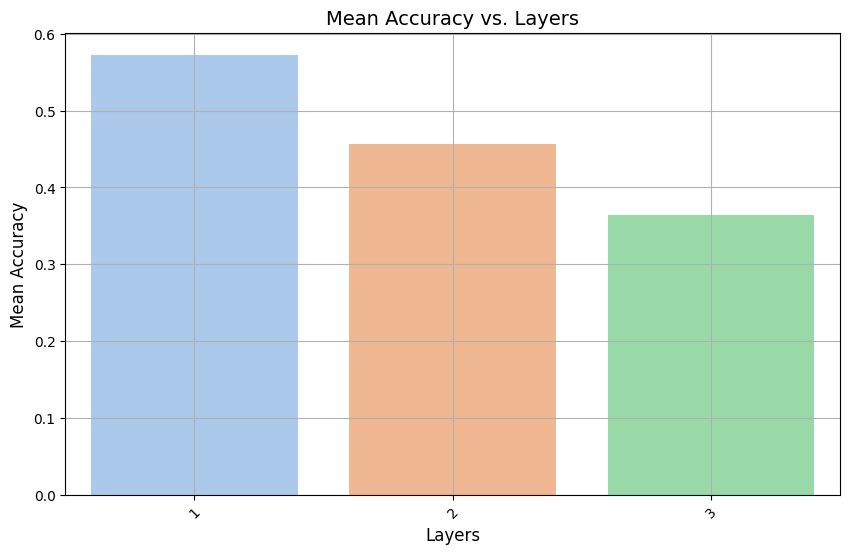

<ipython-input-20-970f26a18a19>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")
<ipython-input-20-970f26a18a19>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")


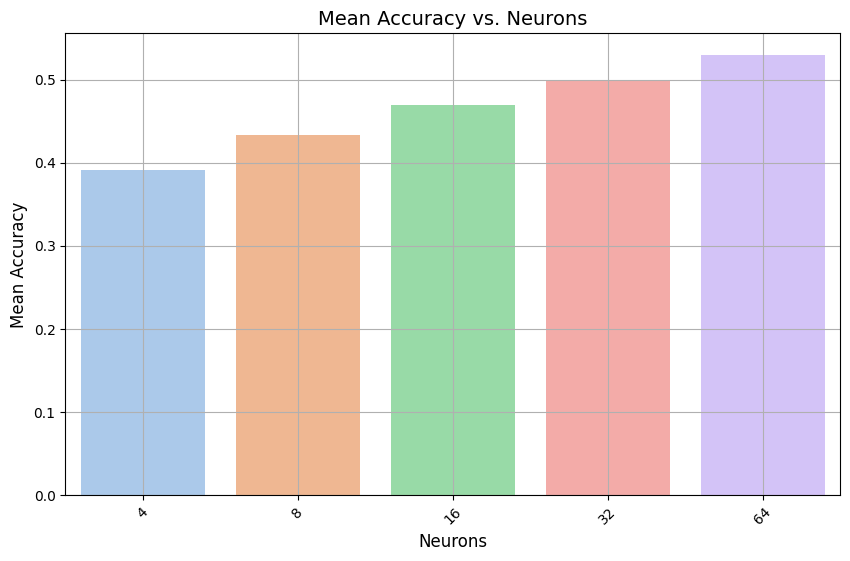

<ipython-input-20-970f26a18a19>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")
<ipython-input-20-970f26a18a19>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")


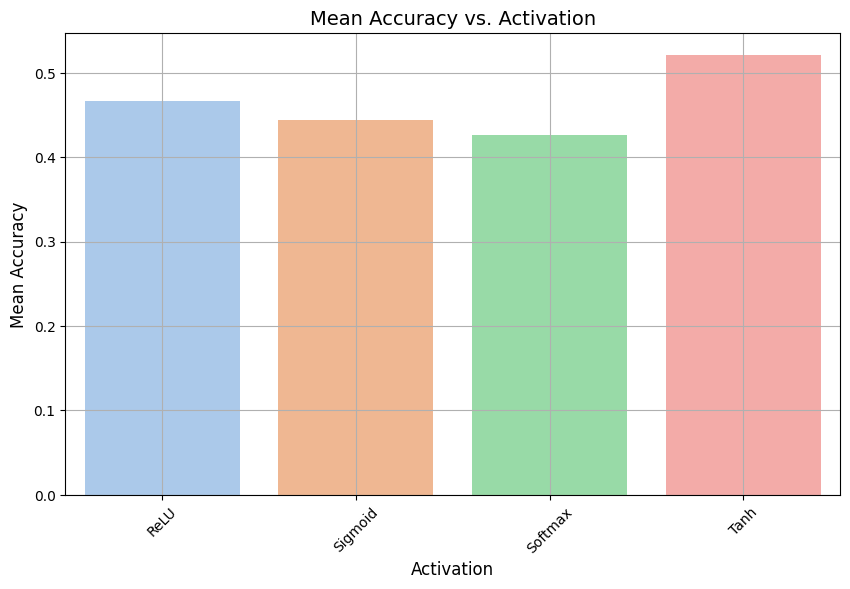

<ipython-input-20-970f26a18a19>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")
<ipython-input-20-970f26a18a19>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")


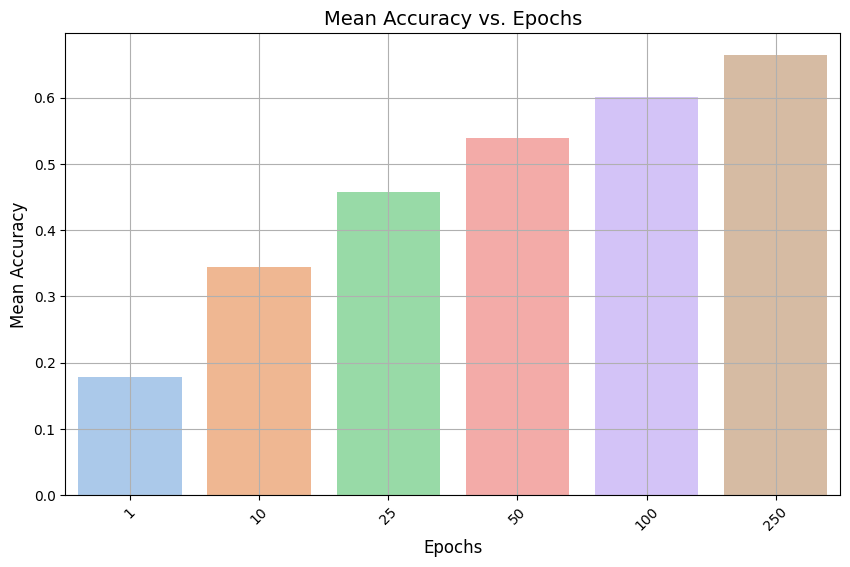

<ipython-input-20-970f26a18a19>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")
<ipython-input-20-970f26a18a19>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")


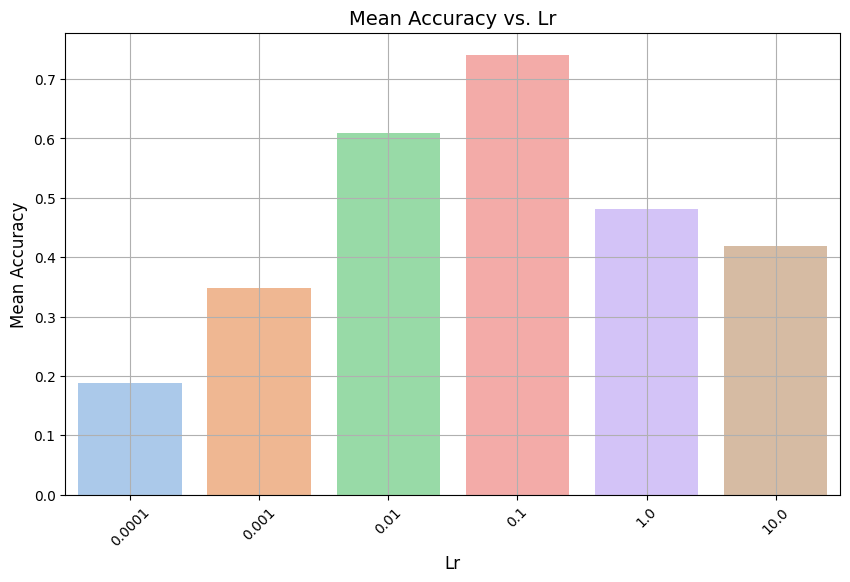

<ipython-input-20-970f26a18a19>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")
<ipython-input-20-970f26a18a19>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")


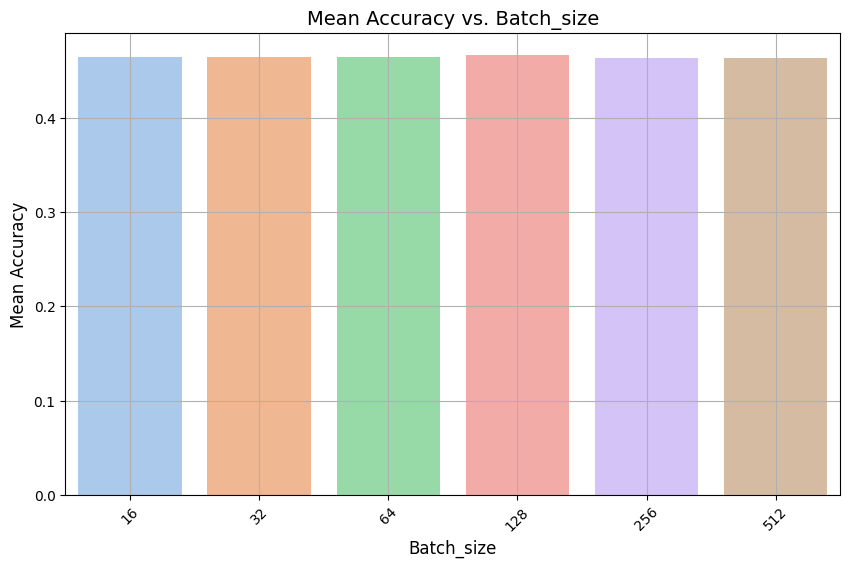

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil DataFrame hasil eksperimen
# Pastikan 'results_df' sudah ada setelah eksekusi kode sebelumnya
results_df = pd.read_csv("mlp_classification_hidden layer 123.csv")

# Calculate mean accuracy for each hyperparameter combination
# Changed 'mae' to 'accuracy' to calculate and plot accuracy
mean_accuracy_by_hyperparameter = results_df.groupby(['layers', 'neurons', 'activation', 'epochs', 'lr', 'batch_size'])['accuracy'].mean().reset_index()

# Plot mean accuracy vs. each hyperparameter
hyperparameters = ['layers', 'neurons', 'activation', 'epochs', 'lr', 'batch_size']

# Create bar plots for each hyperparameter
for param in hyperparameters:
    plt.figure(figsize=(10, 6))
    # Changed 'mae' to 'accuracy' in sns.barplot and ylabel
    sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")
    plt.title(f'Mean Accuracy vs. {param.capitalize()}', fontsize=14) # Changed title to reflect Accuracy
    plt.xlabel(param.capitalize(), fontsize=12)
    plt.ylabel('Mean Accuracy', fontsize=12) # Changed ylabel to reflect Accuracy
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

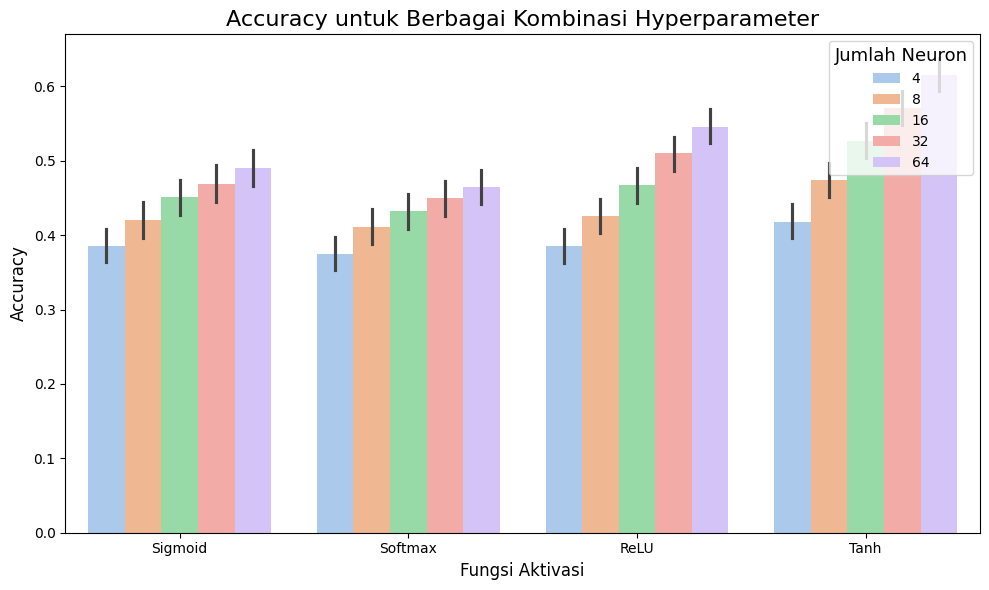

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil DataFrame hasil eksperimen
# Pastikan 'results_df' sudah ada setelah eksekusi kode sebelumnya
results_df = pd.read_csv("mlp_classification_hidden layer 123.csv")

# Plot accuracy untuk setiap kombinasi hyperparameter
plt.figure(figsize=(10, 6))

# Mengubah 'mse' menjadi 'accuracy' pada parameter y
sns.barplot(data=results_df, x='activation', y='accuracy', hue='neurons', palette='pastel')

# Menambahkan judul dan label
plt.title('Accuracy untuk Berbagai Kombinasi Hyperparameter', fontsize=16) # Mengubah judul menjadi Accuracy
plt.xlabel('Fungsi Aktivasi', fontsize=12)
plt.ylabel('Accuracy', fontsize=12) # Mengubah label y menjadi Accuracy
plt.legend(title='Jumlah Neuron', title_fontsize='13', loc='upper right')

# Menampilkan grafik
plt.tight_layout()
plt.show()